# 1. Veriyi Anlama Ve Hazırlama

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 500)

In [3]:
df_ = pd.read_csv("data/flo_data_20k.csv")
df = df_.copy()
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [4]:
# veri setine genel bakış
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [5]:
# sayısal verilere genel bakış
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [6]:
# boş değer sorgusu
df.isnull().sum().any()

False

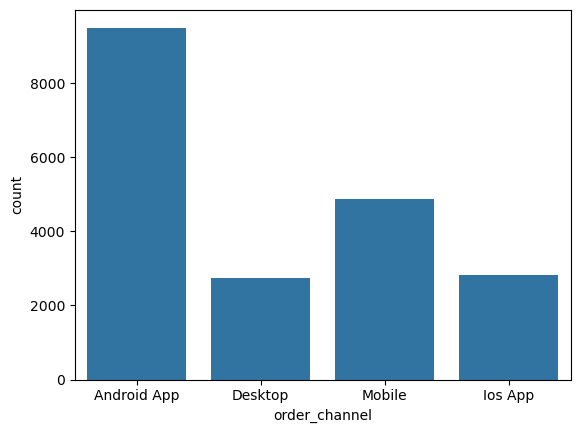

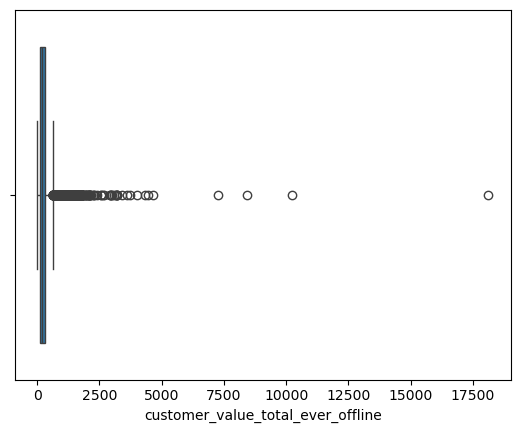

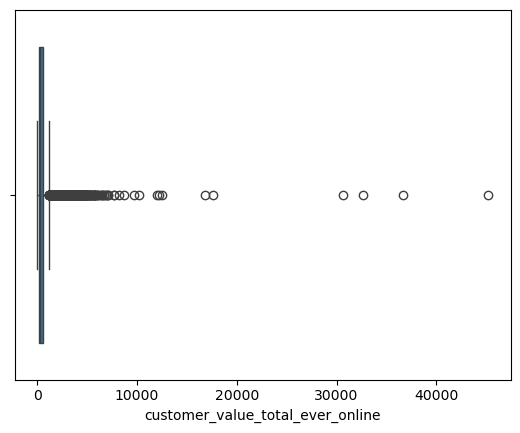

In [7]:
# genel grafikler
sns.countplot(x=df["order_channel"], data=df)
plt.show()

sns.boxplot(x=df["customer_value_total_ever_offline"], data=df)
plt.show()

sns.boxplot(x=df["customer_value_total_ever_online"], data=df)
plt.show()

* Her bir müşterinin toplam alışveriş sayısını ve harcamasını gösteren kolonların oluşturulması

In [8]:
df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["total_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


* Tarih içeren sütunların date formatına çevrilmesi

In [9]:
for col in df.columns:
    if "date" in col:
        df[col] = pd.to_datetime(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

* Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımı

In [11]:
df.groupby("order_channel").agg({"total_order": ["count", "sum"],
                                 "total_value": ["sum", "mean"]})

total_order          total_value            
                    count      sum         sum        mean
order_channel                                             
Android App          9495  52269.0  7819062.76  823.492655
Desktop              2735  10920.0  1610321.46  588.782984
Ios App              2833  15351.0  2525999.93  891.634285
Mobile               4882  21679.0  3028183.16  620.275125

* En fazla kazancı getiren ilk 10 müşteri

In [12]:
df.groupby(["master_id"]).agg({"total_value": "sum"}).sort_values("total_value", ascending=False).head(10)

,total_value
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


* En fazla siparişi veren ilk 10 müşteri

In [13]:
df.groupby(["master_id"]).agg({"total_order": "sum"}).sort_values("total_order", ascending=False).head(10)

,total_order
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


# RFM Metriklerinin Hesaplanması

* Recency, Frequency ve Monetary tanımlarının yapılması:

1. Recency (Güncellik): Müşterinin son satın alma işlemini ne zaman yaptığı.

2. Frequency (Sıklık): Müşterinin belirli bir zaman diliminde ne kadar sıklıkla satın alma yaptığı.

3. Monetary (Para Miktarı): Müşterinin belirli bir zaman diliminde yaptığı toplam harcama.

In [14]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [15]:
today_date = dt.datetime(2021,6,1)

* Recency, Frequency ve Monetary değerlerinin hesaplanması

In [16]:
rfm = df.agg({"master_id": lambda x: x,
              "last_order_date": lambda x: (today_date - x).days,
              "total_order": lambda x: x,
              "total_value": lambda x: x})


rfm.columns = ["master_id", "recency", "frequency", "monetary"]

rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98


# RFM Skorunun Hesaplanması

* Recency, Frequency ve Monetary skorlanın oluşturulması

In [17]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1,2,3,4,5])

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1


* RF değeri

In [18]:
rfm["RF_Score"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31


# RF Skorunun Segment Olarak Tanımlanması

In [19]:
seg_map = {
        r'[1-2][1-2]': 'Hibernating',
        r'[1-2][3-4]': 'At_Risk',
        r'[1-2]5': 'Cant_Loose',
        r'3[1-2]': 'About_to_Sleep',
        r'33': 'Need_Attention',
        r'[3-4][4-5]': 'Loyal_Customers',
        r'41': 'Promising',
        r'51': 'New_Customers',
        r'[4-5][2-3]': 'Potential_Loyalists',
        r'5[4-5]': 'Champions'
    }

rfm['Segment'] = rfm['RF_Score'].replace(seg_map, regex=True)

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,Segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34,Loyal_Customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35,Loyal_Customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24,At_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31,About_to_Sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31,About_to_Sleep


In [20]:
rfm[['Segment', 'recency', 'frequency', 'monetary']].groupby('Segment').agg(['mean','count'])

recency        frequency           monetary      
                           mean count       mean count         mean count
Segment                                                                  
About_to_Sleep       113.785144  1629   2.401473  1629   359.008963  1629
At_Risk              241.606835  3131   4.472373  3131   646.610236  3131
Cant_Loose           235.444167  1200  10.698333  1200  1474.468217  1200
Champions             17.106625  1932   8.934265  1932  1406.625109  1932
Hibernating          247.949501  3604   2.394007  3604   366.267062  3604
Loyal_Customers       82.594763  3361   8.374591  3361  1216.818616  3361
Need_Attention       113.828676   823   3.727825   823   562.142965   823
New_Customers         17.917647   680   2.000000   680   339.955544   680
Potential_Loyalists   37.155888  2938   3.304289  2938   533.184466  2938
Promising             58.921175   647   2.000000   647   335.672705   647

* rfm veri setine kategorilerin eklenmesi

In [21]:
cat_df = df[["master_id", "interested_in_categories_12"]]

rfm = pd.merge(rfm, cat_df)
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_Score,Segment,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34,Loyal_Customers,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35,Loyal_Customers,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24,At_Risk,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31,About_to_Sleep,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31,About_to_Sleep,[AKTIFSPOR]


 # Senaryo Tabanlı Aksiyon Alma

1. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel . müşteri tercihlerinin üstünde. Bu nedenle markanın
tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçeilmek isteniliyor. Bu müşterilerin sadık  ve
kadın kategorisinden alışveriş yapan kişiler olması planlandı. Müşterilerin id numaralarını csv dosyasına yeni_marka_hedef_müşteri_id.cvs
olarak kaydediniz.

In [22]:
womendf = rfm[["master_id", "Segment", "interested_in_categories_12"]]


womendf = womendf.loc[(womendf["interested_in_categories_12"].str.contains("KADIN")) &
                      ((womendf["Segment"] == "Loyal_Customers") | (womendf["Segment"] == "Champions"))]

womendf.to_csv("output/women_df.csv")

womendf.head()

,master_id,Segment,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Loyal_Customers,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Loyal_Customers,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Loyal_Customers,"[ERKEK, COCUK, KADIN]"
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,Champions,"[COCUK, KADIN, AKTIFSPOR]"
33,fb840306-1219-11ea-a001-000d3a38a36f,Loyal_Customers,"[ERKEK, KADIN, AKTIFSPOR]"


* 2. Erkek ve Çoçuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşterilerden olan ama uzun süredir alışveriş yapmayan ve yeni gelen müşteriler özel olarak hedef alınmak isteniliyor. Uygun profildeki müşterilerin id'lerini csv dosyasına indirim_hedef_müşteri_ids.csv olarak kaydediniz.

In [23]:
boys_40df = rfm[["master_id", "Segment", "interested_in_categories_12"]]


boys_40df = boys_40df.loc[((boys_40df["interested_in_categories_12"].str.contains("COCUK")) |
                           (boys_40df["interested_in_categories_12"].str.contains("ERKEK"))) &
                           ((boys_40df["Segment"] == "Hibernating") |
                           (boys_40df["Segment"] == "Cant_Loose") |
                           (boys_40df["Segment"] == "New_Customers"))]

boys_40df.to_csv("output/boys_40df.csv")

boys_40df.head()

,master_id,Segment,interested_in_categories_12
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Hibernating,[COCUK]
10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Hibernating,"[AKTIFCOCUK, COCUK, KADIN]"
15,13ed97a4-b167-11e9-89fa-000d3a38a36f,Cant_Loose,"[AKTIFCOCUK, COCUK, KADIN]"
19,2730793e-3908-11ea-85d6-000d3a38a36f,Hibernating,[ERKEK]
21,7b289956-d691-11e9-93bc-000d3a38a36f,Hibernating,"[ERKEK, KADIN]"
